In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

## Text Preprocessing

In [6]:
import re
import string

In [7]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

### lower case the tweet column

In [12]:

data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [14]:
#removing the links
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test #android #apps #b...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

### remove the punctuations

In [17]:

string.punctuation

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app mobil...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### remove numbers

In [18]:

data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)
data["tweet"].tail(10)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_752\891503960.py:2: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app mobil...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

### remove stop words

In [19]:
!pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 187.9 kB/s eta 0:00:08
     - -------------------------------------- 0.1/1.5 MB 297.7 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.5 MB 532.5 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.5 MB 655.1 kB/s eta 0:00:02
     ------ --------------------------------- 0.3/1.5 MB 714.4 kB/s eta 0:00:02
     -------- ------------------------------- 0.3/1.5 MB 791.9 kB/s eta 0:00:02
     --------- ------------------------------ 0.4/1.5 MB 820.1 kB/s eta 0:00:02
     ---------- ----------------------------- 0.4/1.5 MB 851.5 kB/s eta 0:00:02
     ------------ --------------------------- 0.5/1.5 MB 901.1 kB/s

In [20]:
import nltk
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

### Stemming

In [23]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [24]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vacabulary

In [63]:
from collections import Counter
vocab = Counter()


In [64]:
#gives how many times a word appears
vocab

Counter()

In [66]:
#get each sentence of tweet column and pass evey word of each sentence to the vocab
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [67]:
vocab

Counter({'iphon': 8146,
         'appl': 5752,
         'samsung': 2790,
         'new': 2274,
         'phone': 2030,
         'follow': 1770,
         'soni': 1638,
         '…': 1502,
         'ipad': 1074,
         'rt': 1050,
         'love': 998,
         'like': 910,
         'day': 852,
         'app': 832,
         'life': 830,
         'android': 828,
         'photo': 788,
         'get': 764,
         'io': 764,
         'galaxi': 722,
         'instagram': 716,
         'case': 696,
         'beauti': 644,
         'cute': 644,
         'gain': 622,
         'today': 618,
         'work': 612,
         'im': 588,
         'back': 588,
         'fuck': 586,
         'happi': 586,
         'photographi': 584,
         'game': 564,
         'got': 560,
         'fun': 554,
         'news': 530,
         'thank': 526,
         'music': 526,
         'time': 496,
         'make': 494,
         'updat': 472,
         'smile': 462,
         'instagood': 452,
         'funni': 446

In [28]:
len(vocab)

15949

In [29]:
data.shape 

(7920, 3)

we have 15949 features(unique words) but we have only 7920 rows , so this will definitly overfit. 

so we only get words with count more than 10

In [30]:
tokens = [key for key in vocab if vocab[key] > 10]
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [68]:
len(tokens)

1145

so now (features) < (records)

In [69]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

#save vocabulary to vocabulary.txt file
save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Split Dataset

In [72]:
data.sample(5)

,id,label,tweet
3556,3557,0,flower art flower art colour photographi creat...
6034,6035,0,happi face bc new phone yay newphon samsung ga...
5195,5196,0,time got new iphon iphon appl istor istoresout...
6258,6259,1,lock button top phone broken shitti
1917,1918,1,mean error restor ipod thu lose old music lapt...


In [32]:
X = data['tweet']
y = data['label']

In [33]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/37/a9/08538c29f188b1c37eb6e115a5046c6d17457e1a7b8ea748edd3017ddd6c/scikit_learn-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/f4/ce/be0b376ba6069f3f8ba240aa532a374733447453c93582d4c474effdde21/scipy-1.11.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.2 kB/s eta 0:00:00
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
X_train

3721    michel came home tcot nascar theater movi sing...
648            everi time say get new emoji get hope appl
25      billion patent prior art million patent troll ...
2826    wait day reset appl id type epic failur apples...
2867    spank skate skate lide day weed spank iphoto i...
                              ...                        
3757    realli nice appl account info stolen download ...
2416      appl alway pay primetim show put placement appl
4288    thank univers namasté time samsung cellphon je...
3421    eleg appl watch stand applewatch appl eleg sta...
7562    oh lol rt biancalissett iphon drive nut im rea...
Name: tweet, Length: 6336, dtype: object

In [74]:
X_test

2533    need anoth phone xperia pissin droidbut switch...
6582    select dynam wallpap ipad rubbish appl arent f...
3900    follow capetownsup instagram sup surf fun cape...
749     followback instantfollow ifollowback sing sad ...
1381    im part appl iphon famili appl iphon pictwitte...
                              ...                        
7372    today’ highlight new airpod come home cake the...
1420    gentl creativ digit art children univers green...
5560    sleep elev blackboy weekend red fashion style ...
2964    new babi inlov soni xperiaz beauti hadsom telc...
6458    picstitch yayer happi phone came samsung galax...
Name: tweet, Length: 1584, dtype: object

In [37]:
y_train

3721    0
648     0
25      0
2826    1
2867    0
       ..
3757    1
2416    0
4288    0
3421    0
7562    1
Name: label, Length: 6336, dtype: int64

### Vectorization

In [38]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [39]:
vectorized_x_train = vectorizer(X_train, tokens)

In [40]:
vectorized_x_test = vectorizer(X_test, tokens)

In [77]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
y_train

3721    0
648     0
25      0
2826    1
2867    0
       ..
3757    1
2416    0
4288    0
3421    0
7562    1
Name: label, Length: 6336, dtype: int64

In [43]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
y_test

2533    1
6582    1
3900    0
749     0
1381    0
       ..
7372    0
1420    0
5560    0
2964    0
6458    0
Name: label, Length: 1584, dtype: int64

In [45]:
y_train.value_counts()

label
0    4732
1    1604
Name: count, dtype: int64

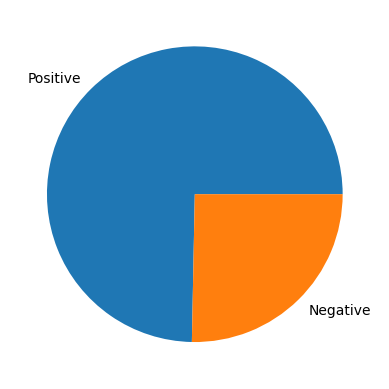

In [46]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [47]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 262.6 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/235.6 kB 262.6 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 297.7 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/235.6 kB 375.8 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 425.1 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/235.6 kB 459.5 kB/s eta 0:00:01
   ------------------------ ------------- 153.6/235.6 kB 459.5 kB/s eta 0:00:01
   -----

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9464, 1145) (9464,)


In [78]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
y_train_smote.value_counts()

label
0    4732
1    4732
Name: count, dtype: int64

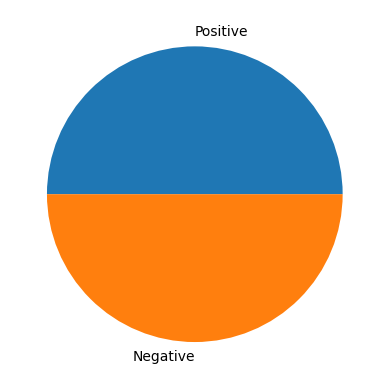

In [50]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [51]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
y_test

2533    1
6582    1
3900    0
749     0
1381    0
       ..
7372    0
1420    0
5560    0
2964    0
6458    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [79]:
#prints the training scores
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

#prints the testing scores
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistice Regression

In [80]:
#builds the model
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

#prints the scores
y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.938
	Precision = 0.917
	Recall = 0.964
	F1-Score = 0.94
Testing Scores:
	Accuracy = 0.866
	Precision = 0.714
	Recall = 0.829
	F1-Score = 0.768


### Naive Bayes

In [81]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)


y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.871
	Recall = 0.958
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.873
	Precision = 0.696
	Recall = 0.929
	F1-Score = 0.796


### Decision Tree

In [82]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)



y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.829
	Precision = 0.686
	Recall = 0.661
	F1-Score = 0.673


### Random Forest

In [83]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)


y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.869
	Precision = 0.759
	Recall = 0.746
	F1-Score = 0.753


### Support Vector Machine

In [84]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.997
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.879
	Precision = 0.756
	Recall = 0.808
	F1-Score = 0.781


In [61]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)